## Analysis of Good vs. Great beers - metrics and beer notes

In [1]:
import pandas as pd

#create df from reviews
df_reviews = pd.read_csv('reviews.csv')

In [2]:
#create df from combined beers.csv and breweries.csv file
df_bb = pd.read_csv('beers_breweries.csv')

In [3]:
#merge beers/breweries with review
df_all = df_bb.merge(df_reviews, on='beer_id')

#check the number or rows in df_all
df_all.shape[0]

7524410

In [4]:
#Will use UM grade definitions to determine good vs. great beer scores
#http://catalog.umd.umich.edu/academic-policies-campus/grading-system/
#90%+ grades = Superior Achievement, translates to beers with overall score of 4.5+
#80%-90% grades = Good Achievement, translates to beers with overall score from 4.0 to < 4.5

df_great = df_all[df_all['score'] >= 4.5]
df_good = df_all[(df_all['score'] >= 4.0) & (df_all['score'] < 4.5)]

In [5]:
#create df for statics for each 
stats_great = df_great.describe()
stats_good = df_good.describe()

In [6]:
#look at difference between great and good beer means
stats_diff = stats_great - stats_good
stats_diff.drop('beer_id', axis=1).loc['mean']

abv        0.973132
look       0.435189
smell      0.489968
taste      0.497182
feel       0.468333
overall    0.476403
score      0.516404
Name: mean, dtype: float64

In [7]:
stats_great.abv.loc['mean'] - stats_good.abv.loc['mean']

0.9731316215188182

### Most noticable increase is mean ABV  (great beers close to 1% in abv higher) <br>

In [8]:
#look at top states for great beers as a percentage
df_great.state.value_counts()[:5]/df_great.state.value_counts().sum()*100

CA    24.261277
MI     8.474978
MA     6.072128
VT     5.403984
IL     5.243284
Name: state, dtype: float64

In [9]:
#look at top states for great beers as a percentage
df_good.state.value_counts()[:5]/df_good.state.value_counts().sum()*100

CA    21.953220
NY     7.044320
MI     7.004450
CO     6.316172
MA     5.617752
Name: state, dtype: float64

### Not much useful information with state comparison <br>

In [10]:
#look at top five beer styles for great beers as a percentage
df_great['style'].value_counts()[:5]/df_great['style'].value_counts().sum()*100

American Imperial Stout    16.458960
American Imperial IPA      15.016581
American IPA               11.097264
American Wild Ale           6.000105
Russian Imperial Stout      5.988268
Name: style, dtype: float64

In [11]:
#look at top five beer styles for great beers as a percentage
df_good['style'].value_counts()[:5]/df_good['style'].value_counts().sum()*100

American IPA               14.675440
American Imperial IPA      12.328932
American Imperial Stout     8.296877
American Pale Ale (APA)     4.872413
American Wild Ale           4.754796
Name: style, dtype: float64

### Interesting comparison between top three beer styles, will plot <br>

In [12]:
#create variables to plot
great_styles = df_great['style'].value_counts()[:3]/df_great['style'].value_counts().sum()*100
good_styles = df_good['style'].value_counts()[:3]/df_good['style'].value_counts().sum()*100
great_styles = great_styles.sort_index(ascending=False)
good_styles = good_styles.sort_index(ascending=False)

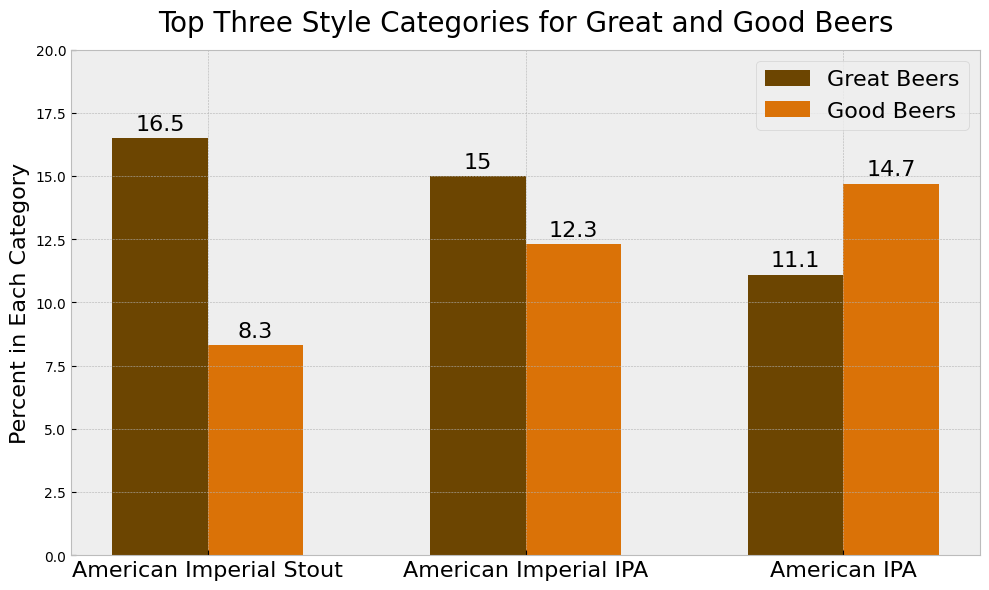

In [13]:
#import libraries needed to plot
import matplotlib.pyplot as plt
import numpy as np

#define data an label
good = round(good_styles,1)
great = round(great_styles,1)
labels = good_styles.keys().tolist()

#set plot parameters
x = np.arange(3)  
width = 0.3  
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,6))

#define location and data for each bar group
rects1 = ax.bar(x - width/2, great, width, label='Great Beers', color='#6C4501')
rects2 = ax.bar(x + width/2, good, width, label='Good Beers', color='#DA7207')

#set additional chart parameters
plt.ylabel('Percent in Each Category', size=16)
plt.title('Top Three Style Categories for Great and Good Beers', y=1.02,size=20)
plt.ylim(top=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=16)
ax.legend(fontsize=16)
ax.grid(linewidth=0.4)
fig.tight_layout()

#add data labels to each of the bar groups
ax.bar_label(rects1, padding=3, size=16)
ax.bar_label(rects2, padding=3, size=16)

#plot the chart
plt.show()

In [14]:
#look at availability types for great beers as a percentage
df_great.availability.value_counts()/df_great.availability.value_counts().sum()*100

Rotating                 45.015874
Year-round               26.497170
Limited (brewed once)    12.843393
Winter                    6.412531
Fall                      4.630395
Spring                    3.189495
Summer                    1.411141
Name: availability, dtype: float64

In [15]:
#look at availability types for good beers as a percentage
df_good.availability.value_counts()/df_good.availability.value_counts().sum()*100

Rotating                 38.860192
Year-round               30.611885
Limited (brewed once)    14.971343
Winter                    5.924155
Fall                      4.836081
Spring                    2.589321
Summer                    2.207021
Name: availability, dtype: float64

### Marginally interesting comparison between top availability types <br>

In [16]:
#check for unique number of great beers
len(df_great.beer_id.unique())

64178

In [17]:
#check for unique number of good beers
len(df_good.beer_id.unique())

144733

In [18]:
#check for unique number of great beers with notes
len(df_great[df_great.beer_notes != 'No notes at this time.'].beer_id.unique())

20316

In [19]:
#check for unique number of good beers with notes
len(df_good[df_good.beer_notes != 'No notes at this time.'].beer_id.unique())

32220

In [20]:
#create a df with each great beer that has a note
df_great_notes = df_great[df_great.beer_notes != 'No notes at this time.'][['beer_id','beer_notes']].drop_duplicates()
df_great_notes.head()

,beer_id,beer_notes
453,268537,Unfiltered and straw colored in appearance thi...
509,196758,2016 GABF Gold Medal Coffee Beer Winner
537,33375,A hoppy Northwest style red ale. Lots of late ...
572,262749,"Medwards says ""If you force fed a watermelon a..."
1027,39024,Formerly named 9LB Porter. Georgetown Porter i...


In [21]:
df_great_notes.shape

(20316, 2)

In [22]:
#create a df with each good beer that has a note
df_good_notes = df_good[df_good.beer_notes != 'No notes at this time.'][['beer_id','beer_notes']].drop_duplicates()
df_good_notes.head()

,beer_id,beer_notes
71,320009,Every time this year
72,262748,"""...you close your eyes and picture a Christma..."
76,182869,"An experiment brewed during the hop shortage, ..."
104,253290,"Crashed hard, but lands soft, Fizzmeow brings ..."
107,150331,"A drinkable ebony brew, warming the frigid day..."


In [23]:
df_good_notes.shape

(32220, 2)

In [24]:
#create code to find word count frequencies using nlkt library
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

#make great beer notes lower case, remove . and , then combine into one string
txt = df_great_notes.beer_notes.str.lower().str.replace(r',', '', regex=True) \
    .str.replace(r'.', '', regex=True).str.cat(sep=' ')

#tokenize words into a list
words = nltk.tokenize.word_tokenize(txt)

#find the frequency of each word
great_word_dist = nltk.FreqDist(words)
great_word_dist

FreqDist({'and': 31016, 'the': 25773, 'a': 25731, 'of': 22023, 'with': 20007, 'is': 11927, 'in': 11914, 'to': 10773, 'this': 9438, 'beer': 7800, ...})

In [25]:
#remove stopwords like and, the, a, etc. then show 15 most common
stopwords = nltk.corpus.stopwords.words('english')
great_words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
great_words_except_stop_dist.pop('’')
great_words_except_stop_dist.pop('!')
great_words_except_stop_dist.pop("'s")
great_words_except_stop_dist.pop('%')
great_words_except_stop_dist.most_common(10)

[('beer', 7800),
 ('ale', 6706),
 ('hops', 5341),
 ('brewed', 5059),
 ('aged', 3938),
 ('ipa', 3919),
 ('hop', 3638),
 ('malt', 3495),
 ('barrels', 3097),
 ('flavor', 2568)]

In [26]:
#make good beer notes lower case, remove . and , then combine into one string
txt = df_good_notes.beer_notes.str.lower().str.replace(r',', '', regex=True) \
    .str.replace(r'.', '', regex=True).str.cat(sep=' ')

#tokenize words into a list
words = nltk.tokenize.word_tokenize(txt)

#find the frequency of each word
good_word_dist = nltk.FreqDist(words)
good_word_dist

FreqDist({'and': 47235, 'a': 38948, 'the': 37862, 'of': 32468, 'with': 32126, 'in': 17412, 'is': 17356, 'to': 15918, 'this': 14261, 'beer': 11724, ...})

In [27]:
#remove stopwords like and, the, a, etc. then show 15 most common
stopwords = nltk.corpus.stopwords.words('english')
good_words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
good_words_except_stop_dist.pop('’')
good_words_except_stop_dist.pop('!')
good_words_except_stop_dist.pop("'s")
good_words_except_stop_dist.most_common(10)

[('beer', 11724),
 ('ale', 10473),
 ('hops', 8422),
 ('brewed', 8370),
 ('ipa', 6078),
 ('aged', 5632),
 ('malt', 5623),
 ('hop', 5517),
 ('barrels', 4261),
 ('flavor', 3906)]

### Not much useful information with state comparison <br>

In [28]:
#Will look at analysis of user reviews in beer_good_great_part2 notebook